Load the data

In [17]:
import tensorflow as tf

In [18]:
trainside = tf.keras.utils.image_dataset_from_directory(
                                            "/Users/lait-zet/Desktop/pose-correction-ai/dataset/train",
                                             shuffle=True,
                                             batch_size=10,
                                             image_size=(48,48),
                                             validation_split=0.2,
                                             subset='training',
                                             seed = 42
                                             )
validationdata = tf.keras.utils.image_dataset_from_directory(
                                            "/Users/lait-zet/Desktop/pose-correction-ai/dataset/train",
                                             shuffle=True,
                                             batch_size=10,
                                             image_size=(48,48),
                                             validation_split=0.2,
                                             subset='validation',
                                             seed = 42
                                             )
for images, labels in trainside.take(1):
    print("shape :",images.shape)
    print("numpy",labels.numpy()) 

Found 1780 files belonging to 2 classes.
Using 1424 files for training.
Found 1780 files belonging to 2 classes.
Using 356 files for validation.
shape : (10, 48, 48, 3)
numpy [1 0 1 1 0 1 0 1 1 0]


2026-02-17 21:43:18.199611: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [19]:
trainside.class_names

['correct', 'incorrect']

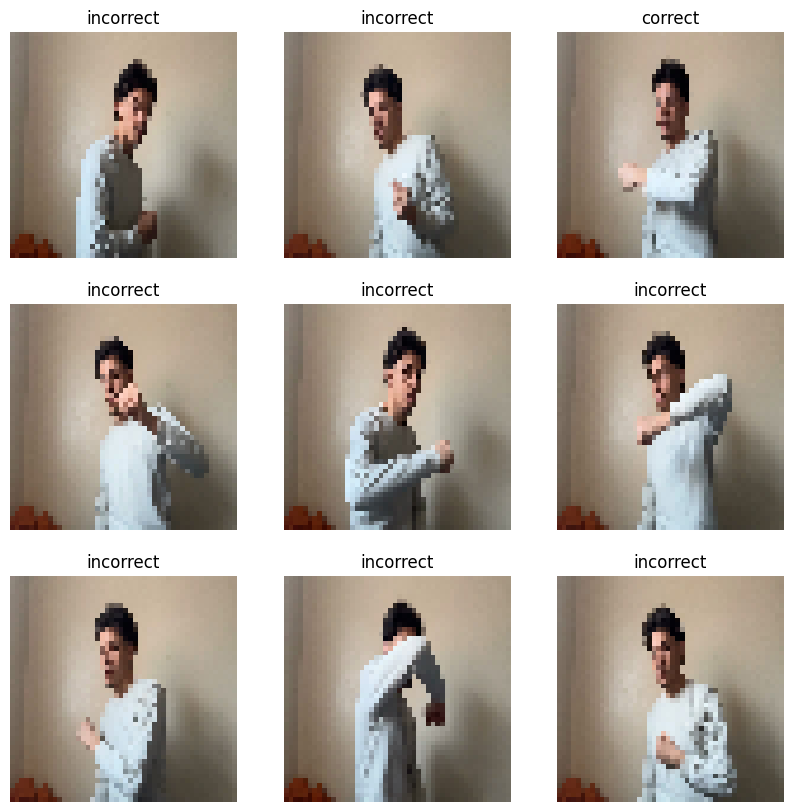

In [20]:
import matplotlib.pyplot as plt
class_names = trainside.class_names

plt.figure(figsize=(10, 10))
for images, labels in trainside.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [21]:
trainside

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 48, 48, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [22]:
trainside = trainside.map(lambda x, y: (x/255.0, y))
validationdata = validationdata.map(lambda x, y: (x/255.0, y))

In [23]:
# from tensorflow.keras import layers, models

# callbacks = [
#     tf.keras.callbacks.EarlyStopping(
#         monitor='val_loss',
#         patience=3,
#         restore_best_weights=True
#     )]
# model = models.Sequential([
#     layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 3)),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64, (3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(128, (3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Flatten(),
#     layers.Dense(128, activation='relu'),
#     layers.Dropout(0.5),
#     layers.Dense(7, activation='softmax')
# ])
# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])
# history = model.fit(
#     trainside,
#     validation_data=validationdata,
#     epochs=20,
#     callbacks=callbacks
# )  

In [1]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Get true labels and predicted labels
y_true = []
y_pred = []
for images, labels in validationdata:
    y_true.extend(labels.numpy())
    predictions = model.predict(images)
    y_pred.extend(np.argmax(predictions, axis=1))
# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')

ModuleNotFoundError: No module named 'sklearn'

In [26]:
#save the model
model.save("pose_correction_model.h5")

In [35]:
#load the model

from tensorflow.keras.models import load_model
model = load_model("pose_correction_model.h5")

#test the model
image_test = "/Users/lait-zet/Desktop/pose-correction-ai/Photo on 2-17-26 at 10.01 PM.jpg"
from tensorflow.keras.preprocessing import image
import numpy as np
img = image.load_img(image_test, target_size=(48, 48))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions[0])
class_name = class_names[predicted_class]
print("Predicted class:", class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Predicted class: correct
